# Sergey Medvedev Project 10

## A/B Testing

## Project Description

In this project, I am using dataset in order to analyse it and test some hypotheses that may help boost revenue of the big online store. 

Data consists of three dataframes: 'Hypotheses' dataframe, which includes number of various hypotheses and their metrics. 'Orders' dataframe, which includes information about visitors of the website, how many transactions each visitor made, when it was done, revenue generated by it and to which group each visitor is allocated. 'Visits' dataframe is simple a dataframe that consists of number of visits of the website by each group each day.

Objectives of this project is split into two parts: in the first part, I will plot and analyse graphs that show the behavour of two groups over time and compare two each other. This will be done several times, by investigating different metrics - revenue, average order size, conversion. Second part of the project is all about hypotheses and whether there are a significant differences between Control and Test groups. 

After all of the analysis, I will provide my final conclusion.

In [1]:
import pandas as pd 
import plotly.express as px
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
try:
    hyp = pd.read_csv('/Users/sergeymedvedev/Downloads/Project 10/hypotheses_us.csv', sep=';')

except FileNotFoundError:
    
    hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
try:
    orders = pd.read_csv('/Users/sergeymedvedev/Downloads/Project 10/orders_us.csv')

except FileNotFoundError:
    
    orders = pd.read_csv('/datasets/orders_us.csv')

In [4]:
try:
    visits = pd.read_csv('/Users/sergeymedvedev/Downloads/Project 10/visits_us.csv')

except FileNotFoundError:
    
    visits = pd.read_csv('/datasets/visits_us.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
pd.set_option('display.max_colwidth', 500)

In [6]:
hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


# 1.1 Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [7]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Effort']

In [8]:
hyp.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


It appears that 'Launch a promotion that gives users discounts on their birthdays', 'Add two new channels for attracting traffic. This will bring 30% more users' and 'Add a subscription form to all the main pages. This will help you compile a mailing list	' are the main hypotheses that company needs to prioritize in terms of ICE framework.

# 1.2 Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [9]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Effort']

In [10]:
hyp.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


It appears that 'Add a subscription form to all the main pages. This will help you compile a mailing list', 'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size' and 'Add two new channels for attracting traffic. This will bring 30% more users' are the main hypotheses that company needs to prioritize in terms of RICE framework.

In [11]:
hyp.sort_values(['ICE', 'RICE'], ascending = [False, False])

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In my opinion, the best hypothesis out of the whole list of different hypotheses is the #7 - Adding a subscription form to all the main pages. In terms of ICE metric it is 3rd, not very far from 1st and 2nd hypotheses in terms of ICE metric, but has by far the highest value in terms of RICE metric. 

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [13]:
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


As it appears, there is a value of 19920.40 in the revenue column. Lets see how it will affect the future analysis.

Furthermore, I will indicate the row that includes such value for future possible use.

In [15]:
print(orders[orders['revenue'] == 19920.40])

     transactionId   visitorId       date  revenue group
425      590470918  1920142716 2019-08-19  19920.4     B


It furthemore appears to be in the B "test" group. It definitely may cause some issues down the line.

There are some people, who are in "orders" dataframe, who were allocated to both "A" and "B" groups. This would make analysis inaccurate. Therefore, I need to indicate those people and remove them from the dataframe.

In [16]:
visitors_in_both_groups = orders.groupby('visitorId')['group'].nunique().eq(2).value_counts()
visitors_in_both_groups

False    973
True      58
Name: group, dtype: int64

In [17]:
condition = (orders['visitorId'] == 8300375) | (orders['visitorId'] == 199603092) | (orders['visitorId'] == 232979603) | (orders['visitorId'] == 237748145) | (orders['visitorId'] == 276558944) | (orders['visitorId'] == 351125977) | (orders['visitorId'] == 393266494) | (orders['visitorId'] == 457167155) | (orders['visitorId'] == 471551937) | (orders['visitorId'] == 477780734) | (orders['visitorId'] == 818047933) | (orders['visitorId'] == 963407295) | (orders['visitorId'] == 1230306981) | (orders['visitorId'] == 1294878855) | (orders['visitorId'] == 1316129916) | (orders['visitorId'] == 1333886533) | (orders['visitorId'] == 1404934699) | (orders['visitorId'] == 1602967004) | (orders['visitorId'] == 1614305549) | (orders['visitorId'] == 1648269707) | (orders['visitorId'] == 1668030113) | (orders['visitorId'] == 1738359350) | (orders['visitorId'] == 1801183820) | (orders['visitorId'] == 1959144690) | (orders['visitorId'] == 2038680547) | (orders['visitorId'] == 2044997962) | (orders['visitorId'] == 2378935119) | (orders['visitorId'] == 2458001652) | (orders['visitorId'] == 2579882178) | (orders['visitorId'] == 2587333274) | (orders['visitorId'] == 2600415354) | (orders['visitorId'] == 2654030115) | (orders['visitorId'] == 2686716486) | (orders['visitorId'] == 2712142231) | (orders['visitorId'] == 2716752286) | (orders['visitorId'] == 2780786433) | (orders['visitorId'] == 2927087541) | (orders['visitorId'] == 2949041841) | (orders['visitorId'] == 2954449915) | (orders['visitorId'] == 3062433592) | (orders['visitorId'] == 3202540741) | (orders['visitorId'] == 3234906277) | (orders['visitorId'] == 3656415546) | (orders['visitorId'] == 3717692402) | (orders['visitorId'] == 3766097110) | (orders['visitorId'] == 3803269165) | (orders['visitorId'] == 3891541246) | (orders['visitorId'] == 3941795274) | (orders['visitorId'] == 3951559397) | (orders['visitorId'] == 3957174400) | (orders['visitorId'] == 3963646447) | (orders['visitorId'] == 3972127743) | (orders['visitorId'] == 3984495233) | (orders['visitorId'] == 4069496402) | (orders['visitorId'] == 4120364173) | (orders['visitorId'] == 4186807279) | (orders['visitorId'] == 4256040402) | (orders['visitorId'] == 4266935830)

In [18]:
orders_new = orders
orders_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In order to do analysis, I divided the Orders dataframe into two daraframes - control and test, where control has people in group A and test has people in group B

In [19]:
control = orders_new[orders_new['group'] == 'A'].reset_index()
control

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [20]:
test = orders_new[orders_new['group'] == 'B'].reset_index()
test

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
635,1189,4082620617,393266494,2019-08-14,490.4,B
636,1190,38478481,1197745035,2019-08-14,135.3,B
637,1191,3592955527,608641596,2019-08-14,255.7,B
638,1192,2662137336,3733762160,2019-08-14,100.8,B


# 2.1 Graph cumulative revenue by group. Make conclusions and conjectures.

In [21]:
control_cum = control.groupby('date')[['transactionId', 'visitorId', 'revenue']].agg({'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}).reset_index()
control_cum.head()

,date,transactionId,visitorId,revenue
0,2019-08-01,24,20,2356.8
1,2019-08-02,20,19,1503.5
2,2019-08-03,24,24,1815.2
3,2019-08-04,16,15,1146.6
4,2019-08-05,25,25,1988.1


In [22]:
control_cum['cum_rev_A'] = control_cum['revenue'].cumsum()
control_cum.head()

,date,transactionId,visitorId,revenue,cum_rev_A
0,2019-08-01,24,20,2356.8,2356.8
1,2019-08-02,20,19,1503.5,3860.3
2,2019-08-03,24,24,1815.2,5675.5
3,2019-08-04,16,15,1146.6,6822.1
4,2019-08-05,25,25,1988.1,8810.2


In [23]:
test_cum = test.groupby('date')[['transactionId', 'visitorId', 'revenue']].agg({'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}).reset_index()
test_cum.head()

,date,transactionId,visitorId,revenue
0,2019-08-01,21,20,1620.0
1,2019-08-02,24,23,2623.8
2,2019-08-03,16,16,1806.8
3,2019-08-04,17,16,1717.3
4,2019-08-05,23,23,1495.0


In [24]:
test_cum['cum_rev_B'] = test_cum['revenue'].cumsum()
test_cum.head()

,date,transactionId,visitorId,revenue,cum_rev_B
0,2019-08-01,21,20,1620.0,1620.0
1,2019-08-02,24,23,2623.8,4243.8
2,2019-08-03,16,16,1806.8,6050.6
3,2019-08-04,17,16,1717.3,7767.9
4,2019-08-05,23,23,1495.0,9262.9


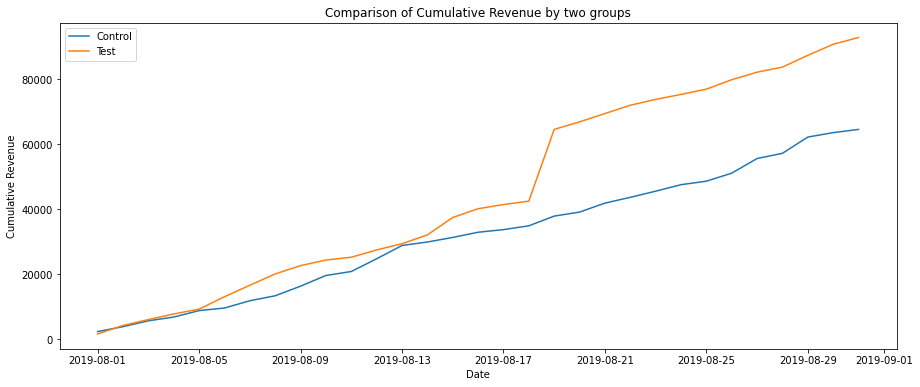

In [25]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(control_cum['date'], control_cum['cum_rev_A'], label='Control')
plt.plot(test_cum['date'], test_cum['cum_rev_B'], label='Test')
plt.title('Comparison of Cumulative Revenue by two groups')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.legend()

Graph shows that cumulative revenue had a pretty consistent increase in both Control and Test groups with some small fluctuations between both groups in the first half of the month. However, in the second half of November, there was a sudden increase in cumulative revenue in Test group, which had it impact, but after cumulative revenue for both Control and Test groups were continuing to rise at the same level. 

In [26]:
orders_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


# 2.2 Graph cumulative average order size by group. Make conclusions and conjectures.

In [27]:
control_cum['cum_order_A'] = control_cum['transactionId'].cumsum()
control_cum['cum_avg_A'] = control_cum['cum_rev_A'] / control_cum['cum_order_A']
control_cum['avg_A'] = control_cum['revenue'] / control_cum['transactionId']
control_cum.head()

,date,transactionId,visitorId,revenue,cum_rev_A,cum_order_A,cum_avg_A,avg_A
0,2019-08-01,24,20,2356.8,2356.8,24,98.200000,98.200000
1,2019-08-02,20,19,1503.5,3860.3,44,87.734091,75.175000
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235,75.633333
3,2019-08-04,16,15,1146.6,6822.1,84,81.215476,71.662500
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523,79.524000


In [28]:
test_cum['cum_order_B'] = test_cum['transactionId'].cumsum()
test_cum['cum_avg_B'] = test_cum['cum_rev_B'] / test_cum['cum_order_B']
test_cum['avg_B'] = test_cum['revenue'] / test_cum['transactionId']
test_cum.head()

,date,transactionId,visitorId,revenue,cum_rev_B,cum_order_B,cum_avg_B,avg_B
0,2019-08-01,21,20,1620.0,1620.0,21,77.142857,77.142857
1,2019-08-02,24,23,2623.8,4243.8,45,94.306667,109.325000
2,2019-08-03,16,16,1806.8,6050.6,61,99.190164,112.925000
3,2019-08-04,17,16,1717.3,7767.9,78,99.588462,101.017647
4,2019-08-05,23,23,1495.0,9262.9,101,91.711881,65.000000


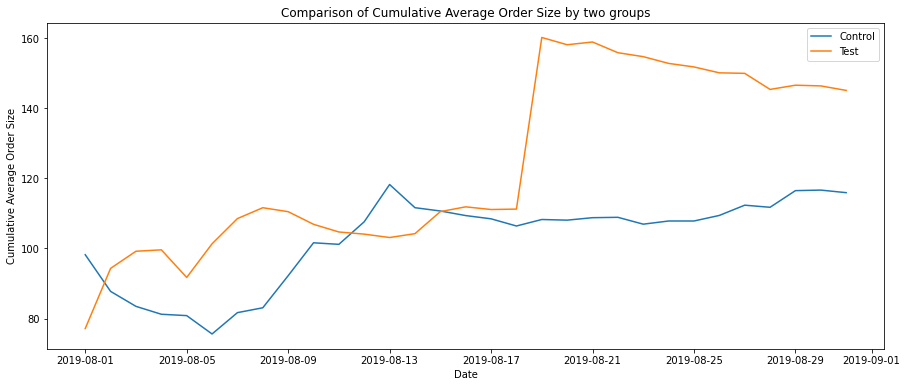

In [29]:
plt.plot(control_cum['date'], control_cum['cum_avg_A'], label='Control')
plt.plot(test_cum['date'], test_cum['cum_avg_B'], label='Test')
plt.title('Comparison of Cumulative Average Order Size by two groups')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.legend()

Cumulative average order sizes for Control and Test groups were varied from the start - average order sizes for Test group were increasing while average order sizes for the Control group were decreasing and then rising but later they were not too dissimilar. But once again, on 19th of November there was a massive increase in cumulative average order size for Test group. 

## 2.3 Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [30]:
relative_difference = control_cum.merge(test_cum, how='left', on='date')
relative_difference.head()

,date,transactionId_x,visitorId_x,revenue_x,cum_rev_A,cum_order_A,cum_avg_A,avg_A,transactionId_y,visitorId_y,revenue_y,cum_rev_B,cum_order_B,cum_avg_B,avg_B
0,2019-08-01,24,20,2356.8,2356.8,24,98.200000,98.200000,21,20,1620.0,1620.0,21,77.142857,77.142857
1,2019-08-02,20,19,1503.5,3860.3,44,87.734091,75.175000,24,23,2623.8,4243.8,45,94.306667,109.325000
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235,75.633333,16,16,1806.8,6050.6,61,99.190164,112.925000
3,2019-08-04,16,15,1146.6,6822.1,84,81.215476,71.662500,17,16,1717.3,7767.9,78,99.588462,101.017647
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523,79.524000,23,23,1495.0,9262.9,101,91.711881,65.000000


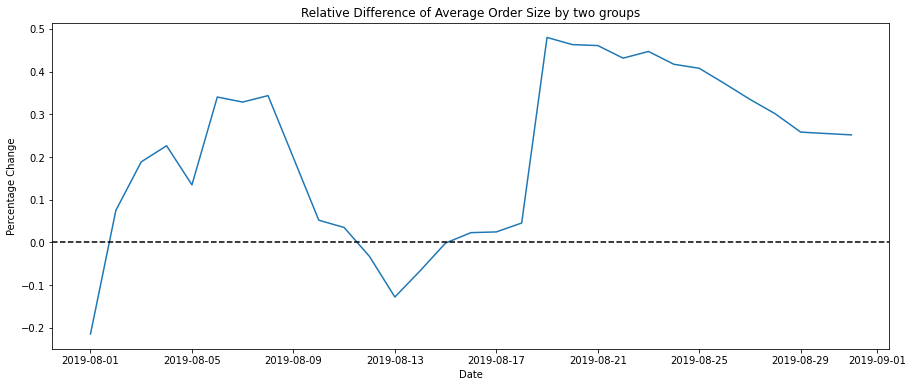

In [31]:
plt.plot(relative_difference['date'], (relative_difference['cum_rev_B']/relative_difference['cum_order_B'])/(relative_difference['cum_rev_A']/relative_difference['cum_order_A'])-1)
plt.title('Relative Difference of Average Order Size by two groups')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.axhline(y=0, color='black', linestyle='--') 

Graph above shows the relative difference in cumulative average order size between Test group and Control group. In the first half of November, there cumulative average order sizes of Test group were bigger than that of Control group. Later, between 10th and 18th of November, cumulative average order size between two groups were similar but then, on 19th of November there was another big spike, indicating that there possibly may have been an outlier in the Test group, which caused such an increase in the relative difference between two groups.

It appears that there is an outlier in the Test group that makes graph looks misrepresentable and which needs to be removed. 

In [32]:
print(orders_new.loc[425])

transactionId              590470918
visitorId                 1920142716
date             2019-08-19 00:00:00
revenue                      19920.4
group                              B
Name: 425, dtype: object


This value of 19920.40 in the Revenue column of the test group provides biased results. I will remove that value from the data and redo the analysis

In [33]:
orders_new_filtered = orders_new.drop(orders_new.index[425], axis=0)
orders_new_filtered.reset_index()

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1191,1192,2662137336,3733762160,2019-08-14,100.8,B
1192,1193,2203539145,370388673,2019-08-14,50.1,A
1193,1194,1807773912,573423106,2019-08-14,165.3,A
1194,1195,1947021204,1614305549,2019-08-14,5.5,A


In [34]:
control_filtered = orders_new_filtered[orders_new_filtered['group'] == 'A'].reset_index()
control_filtered

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [35]:
test_filtered = orders_new_filtered[orders_new_filtered['group'] == 'B'].reset_index()
test_filtered

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
634,1189,4082620617,393266494,2019-08-14,490.4,B
635,1190,38478481,1197745035,2019-08-14,135.3,B
636,1191,3592955527,608641596,2019-08-14,255.7,B
637,1192,2662137336,3733762160,2019-08-14,100.8,B


In [36]:
control_cum_filtered = control_filtered.groupby('date')[['transactionId', 'visitorId', 'revenue']].agg({'transactionId': 'count', 'visitorId': 'nunique', 'revenue': 'sum'}).reset_index()
control_cum_filtered['cum_rev_A'] = control_cum_filtered['revenue'].cumsum()
control_cum_filtered.head()

,date,transactionId,visitorId,revenue,cum_rev_A
0,2019-08-01,24,20,2356.8,2356.8
1,2019-08-02,20,19,1503.5,3860.3
2,2019-08-03,24,24,1815.2,5675.5
3,2019-08-04,16,15,1146.6,6822.1
4,2019-08-05,25,25,1988.1,8810.2


In [37]:
test_cum_filtered = test_filtered.groupby('date')[['transactionId', 'visitorId', 'revenue']].agg({'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}).reset_index()
test_cum_filtered['cum_rev_B'] = test_cum_filtered['revenue'].cumsum()
test_cum_filtered.head()

,date,transactionId,visitorId,revenue,cum_rev_B
0,2019-08-01,21,20,1620.0,1620.0
1,2019-08-02,24,23,2623.8,4243.8
2,2019-08-03,16,16,1806.8,6050.6
3,2019-08-04,17,16,1717.3,7767.9
4,2019-08-05,23,23,1495.0,9262.9


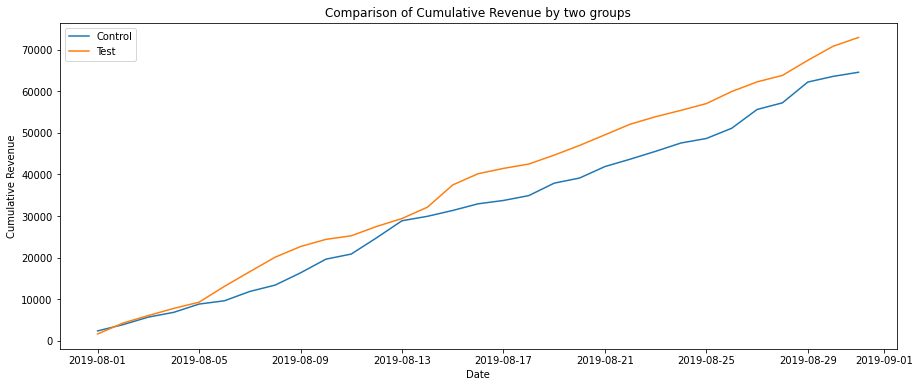

In [38]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(control_cum_filtered['date'], control_cum_filtered['cum_rev_A'], label='Control')
plt.plot(test_cum_filtered['date'], test_cum_filtered['cum_rev_B'], label='Test')
plt.title('Comparison of Cumulative Revenue by two groups')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.legend()

Here, after removal of the outlier, we can see that cumulative revenue for both Control and Test groups was increasing steadily and consistently. Cumulative revenue for Test group was always surpassing that of Control group and the gap between Test group and Control group was pretty much the same since the middle of November.

In [39]:
test_cum_filtered['cum_order_B'] = test_cum_filtered['transactionId'].cumsum()
test_cum_filtered['cum_avg_B'] = test_cum_filtered['cum_rev_B'] / test_cum_filtered['cum_order_B']
test_cum_filtered['avg_B'] = test_cum_filtered['revenue'] / test_cum_filtered['transactionId']
test_cum_filtered.head()

,date,transactionId,visitorId,revenue,cum_rev_B,cum_order_B,cum_avg_B,avg_B
0,2019-08-01,21,20,1620.0,1620.0,21,77.142857,77.142857
1,2019-08-02,24,23,2623.8,4243.8,45,94.306667,109.325000
2,2019-08-03,16,16,1806.8,6050.6,61,99.190164,112.925000
3,2019-08-04,17,16,1717.3,7767.9,78,99.588462,101.017647
4,2019-08-05,23,23,1495.0,9262.9,101,91.711881,65.000000


In [40]:
control_cum_filtered['cum_order_A'] = control_cum_filtered['transactionId'].cumsum()
control_cum_filtered['cum_avg_A'] = control_cum_filtered['cum_rev_A'] / control_cum_filtered['cum_order_A']
control_cum_filtered['avg_A'] = control_cum_filtered['revenue'] / control_cum_filtered['transactionId']
control_cum_filtered.head()

,date,transactionId,visitorId,revenue,cum_rev_A,cum_order_A,cum_avg_A,avg_A
0,2019-08-01,24,20,2356.8,2356.8,24,98.200000,98.200000
1,2019-08-02,20,19,1503.5,3860.3,44,87.734091,75.175000
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235,75.633333
3,2019-08-04,16,15,1146.6,6822.1,84,81.215476,71.662500
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523,79.524000


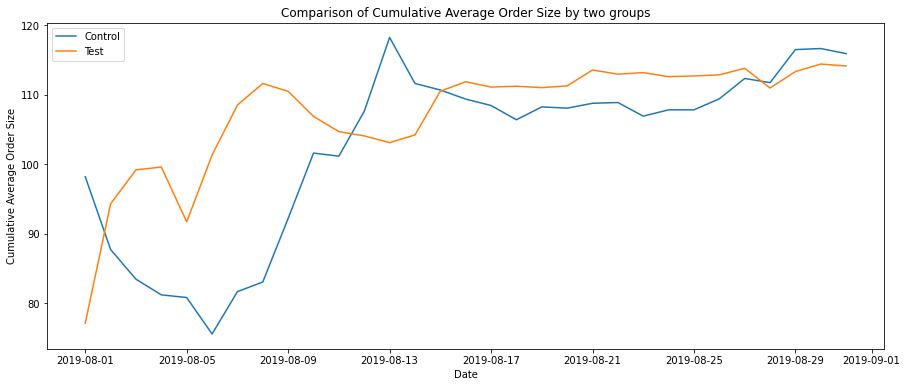

In [41]:
plt.plot(control_cum_filtered['date'], control_cum_filtered['cum_avg_A'], label='Control')
plt.plot(test_cum_filtered['date'], test_cum_filtered['cum_avg_B'], label='Test')
plt.title('Comparison of Cumulative Average Order Size by two groups')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.legend()

Graph shows that with regards to average order size, Control group seems much more volatile, having more peaks and troughs, while Test group is more consistent, having mostly all of the order sizes in the 80-175 range. 

In [42]:
relative_difference_filtered = control_cum_filtered.merge(test_cum_filtered, how='left', on='date')
relative_difference_filtered.head()

,date,transactionId_x,visitorId_x,revenue_x,cum_rev_A,cum_order_A,cum_avg_A,avg_A,transactionId_y,visitorId_y,revenue_y,cum_rev_B,cum_order_B,cum_avg_B,avg_B
0,2019-08-01,24,20,2356.8,2356.8,24,98.200000,98.200000,21,20,1620.0,1620.0,21,77.142857,77.142857
1,2019-08-02,20,19,1503.5,3860.3,44,87.734091,75.175000,24,23,2623.8,4243.8,45,94.306667,109.325000
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235,75.633333,16,16,1806.8,6050.6,61,99.190164,112.925000
3,2019-08-04,16,15,1146.6,6822.1,84,81.215476,71.662500,17,16,1717.3,7767.9,78,99.588462,101.017647
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523,79.524000,23,23,1495.0,9262.9,101,91.711881,65.000000


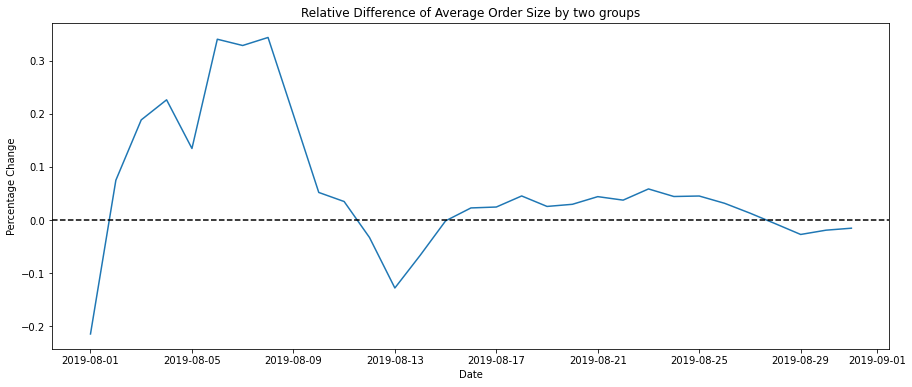

In [43]:
plt.plot(relative_difference_filtered['date'], (relative_difference_filtered['cum_rev_B']/relative_difference_filtered['cum_order_B'])/(relative_difference_filtered['cum_rev_A']/relative_difference_filtered['cum_order_A'])-1)
plt.title('Relative Difference of Average Order Size by two groups')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.axhline(y=0, color='black', linestyle='--') 

In the filtered from the outlier in the Test group dataframe, we see that relative difference between two groups in the first half of November stayed  the same - cumulative average order size of Test group was bigger than that of the Control group. However, in the second group, relative difference between Test and Control group became close to 0.

In [44]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [45]:
visits['date'] = pd.to_datetime(visits['date'])

In [46]:
orders_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


# 2.4 Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [47]:
visits_a = visits[visits['group'] == 'A'].reset_index()
visits_a['visits_a_cum'] = visits_a['visits'].cumsum()
visits_a

,index,date,group,visits,visits_a_cum
0,0,2019-08-01,A,719,719
1,1,2019-08-02,A,619,1338
2,2,2019-08-03,A,507,1845
3,3,2019-08-04,A,717,2562
4,4,2019-08-05,A,756,3318
5,5,2019-08-06,A,667,3985
6,6,2019-08-07,A,644,4629
7,7,2019-08-08,A,610,5239
8,8,2019-08-09,A,617,5856
9,9,2019-08-10,A,406,6262


In [48]:
visits_b = visits[visits['group'] == 'B'].reset_index()
visits_b['visits_b_cum'] = visits_b['visits'].cumsum()
visits_b

,index,date,group,visits,visits_b_cum
0,31,2019-08-01,B,713,713
1,32,2019-08-02,B,581,1294
2,33,2019-08-03,B,509,1803
3,34,2019-08-04,B,770,2573
4,35,2019-08-05,B,707,3280
5,36,2019-08-06,B,655,3935
6,37,2019-08-07,B,709,4644
7,38,2019-08-08,B,654,5298
8,39,2019-08-09,B,610,5908
9,40,2019-08-10,B,369,6277


In [49]:
conv_a = visits_a.merge(control_cum, on='date')
conv_a['conv_a'] = conv_a['transactionId'] / conv_a['visits']
conv_a['conv_a_cum'] = conv_a['cum_order_A']/conv_a['visits_a_cum']
conv_a

,index,date,group,visits,visits_a_cum,transactionId,visitorId,revenue,cum_rev_A,cum_order_A,cum_avg_A,avg_A,conv_a,conv_a_cum
0,0,2019-08-01,A,719,719,24,20,2356.8,2356.8,24,98.200000,98.200000,0.033380,0.033380
1,1,2019-08-02,A,619,1338,20,19,1503.5,3860.3,44,87.734091,75.175000,0.032310,0.032885
2,2,2019-08-03,A,507,1845,24,24,1815.2,5675.5,68,83.463235,75.633333,0.047337,0.036856
3,3,2019-08-04,A,717,2562,16,15,1146.6,6822.1,84,81.215476,71.662500,0.022315,0.032787
4,4,2019-08-05,A,756,3318,25,25,1988.1,8810.2,109,80.827523,79.524000,0.033069,0.032851
5,5,2019-08-06,A,667,3985,18,15,789.8,9600.0,127,75.590551,43.877778,0.026987,0.031870
6,6,2019-08-07,A,644,4629,18,18,2242.9,11842.9,145,81.675172,124.605556,0.027950,0.031324
7,7,2019-08-08,A,610,5239,16,16,1530.4,13373.3,161,83.063975,95.650000,0.026230,0.030731
8,8,2019-08-09,A,617,5856,16,14,2947.1,16320.4,177,92.205650,184.193750,0.025932,0.030225
9,9,2019-08-10,A,406,6262,16,16,3288.2,19608.6,193,101.598964,205.512500,0.039409,0.030821


In [50]:
conv_b = visits_b.merge(test_cum, on='date')
conv_b['conv_b'] = conv_b['transactionId'] / conv_b['visits']
conv_b['conv_b_cum'] = conv_b['cum_order_B']/conv_b['visits_b_cum']
conv_b

,index,date,group,visits,visits_b_cum,transactionId,visitorId,revenue,cum_rev_B,cum_order_B,cum_avg_B,avg_B,conv_b,conv_b_cum
0,31,2019-08-01,B,713,713,21,20,1620.0,1620.0,21,77.142857,77.142857,0.029453,0.029453
1,32,2019-08-02,B,581,1294,24,23,2623.8,4243.8,45,94.306667,109.325000,0.041308,0.034776
2,33,2019-08-03,B,509,1803,16,16,1806.8,6050.6,61,99.190164,112.925000,0.031434,0.033833
3,34,2019-08-04,B,770,2573,17,16,1717.3,7767.9,78,99.588462,101.017647,0.022078,0.030315
4,35,2019-08-05,B,707,3280,23,23,1495.0,9262.9,101,91.711881,65.000000,0.032532,0.030793
5,36,2019-08-06,B,655,3935,28,26,3806.4,13069.3,129,101.312403,135.942857,0.042748,0.032783
6,37,2019-08-07,B,709,4644,24,24,3531.5,16600.8,153,108.501961,147.145833,0.033850,0.032946
7,38,2019-08-08,B,654,5298,27,27,3487.8,20088.6,180,111.603333,129.177778,0.041284,0.033975
8,39,2019-08-09,B,610,5908,25,24,2558.1,22646.7,205,110.471707,102.324000,0.040984,0.034699
9,40,2019-08-10,B,369,6277,23,23,1720.4,24367.1,228,106.873246,74.800000,0.062331,0.036323


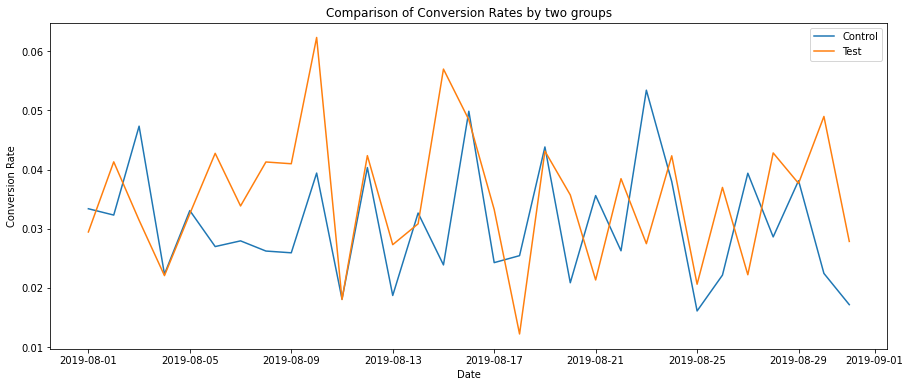

In [51]:
plt.plot(conv_a['date'], conv_a['conv_a'], label='Control')
plt.plot(conv_b['date'], conv_b['conv_b'], label='Test')
plt.title('Comparison of Conversion Rates by two groups')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()

Graph of the conversion rates for Control and Test groups shows that both of the groups had pretty volatile conversion rates. While in the first half of November, it is clear that Control group had lower but more consistent conversion rate of approximately 3%. At the same time in Test group, on the other hand, conversion rate was from 6% to approximately 1%. In the second half of November, after the removal of an outlier, picture is different - Test group is more consistent, having conversion rate is the range of 2% - 4.5%, while conversion rate of the Control group is in the range of 1.5% - 5%

In [52]:
conv_difference = conv_a.merge(conv_b, how='left', on='date')
conv_difference.head()

,index_x,date,group_x,visits_x,visits_a_cum,transactionId_x,visitorId_x,revenue_x,cum_rev_A,cum_order_A,...,visits_b_cum,transactionId_y,visitorId_y,revenue_y,cum_rev_B,cum_order_B,cum_avg_B,avg_B,conv_b,conv_b_cum
0,0,2019-08-01,A,719,719,24,20,2356.8,2356.8,24,...,713,21,20,1620.0,1620.0,21,77.142857,77.142857,0.029453,0.029453
1,1,2019-08-02,A,619,1338,20,19,1503.5,3860.3,44,...,1294,24,23,2623.8,4243.8,45,94.306667,109.325000,0.041308,0.034776
2,2,2019-08-03,A,507,1845,24,24,1815.2,5675.5,68,...,1803,16,16,1806.8,6050.6,61,99.190164,112.925000,0.031434,0.033833
3,3,2019-08-04,A,717,2562,16,15,1146.6,6822.1,84,...,2573,17,16,1717.3,7767.9,78,99.588462,101.017647,0.022078,0.030315
4,4,2019-08-05,A,756,3318,25,25,1988.1,8810.2,109,...,3280,23,23,1495.0,9262.9,101,91.711881,65.000000,0.032532,0.030793


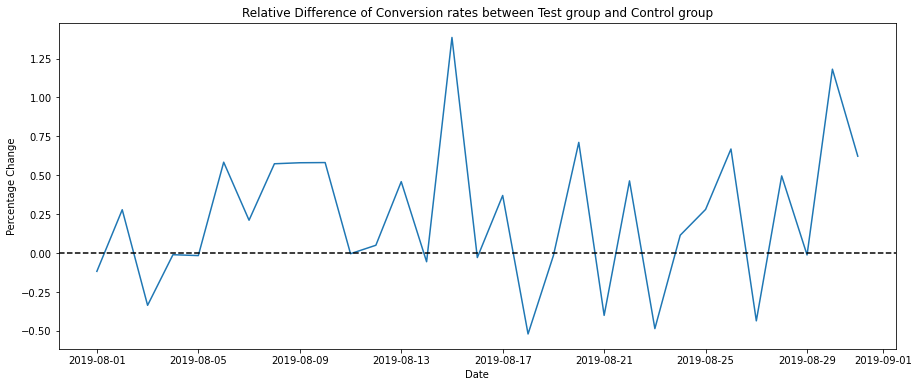

In [53]:
plt.plot(conv_difference['date'], (conv_difference['conv_b'])/(conv_difference['conv_a'])-1)
plt.title('Relative Difference of Conversion rates between Test group and Control group')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.axhline(y=0, color='black', linestyle='--') 

It appears from the graph above, that in the first halp of the month, convesrion rate of the Test group was more often than not higher than that of the Control group with peak on 14th of November, where conversion rate of Test group was more that of Control group by more than 125%. In the second half of November, however, there was great fluctuation in relative difference in conversion between two groups - on one day Control group had greater relative conversion rate that Test group, on the next day Test group had greater relative difference in conversion rate that Control group. But out of 31 days, on 18 days, Test group had greater relative conversion rate that Control group. 

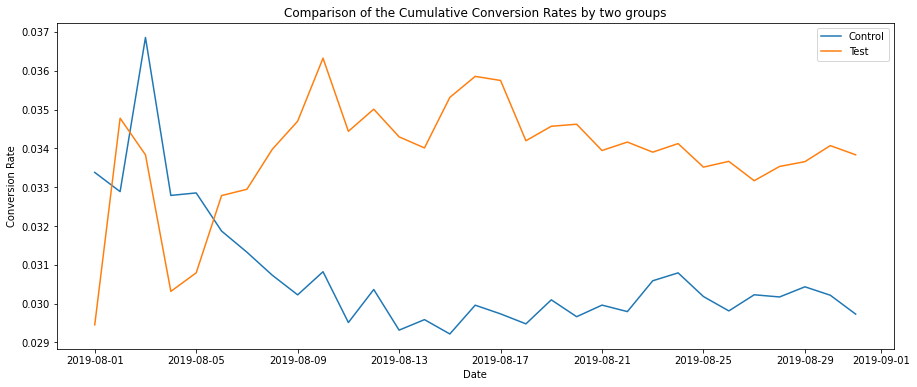

In [54]:
plt.plot(conv_a['date'], conv_a['conv_a_cum'], label='Control')
plt.plot(conv_b['date'], conv_b['conv_b_cum'], label='Test')
plt.title('Comparison of the Cumulative Conversion Rates by two groups')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()

Graph above shows the cumulative converstion rate between two groups. Graph shows that the Test group had higher cumulative conversion rate than the Control group for majority of the month. Only in the beginning of the month, cumulative conversion rate of the Test group was lower than that of the Control group. After 6th of November, cumulative conversion rate of the Test group was consistently bigger than cumulative conversion rate of the Control group. 

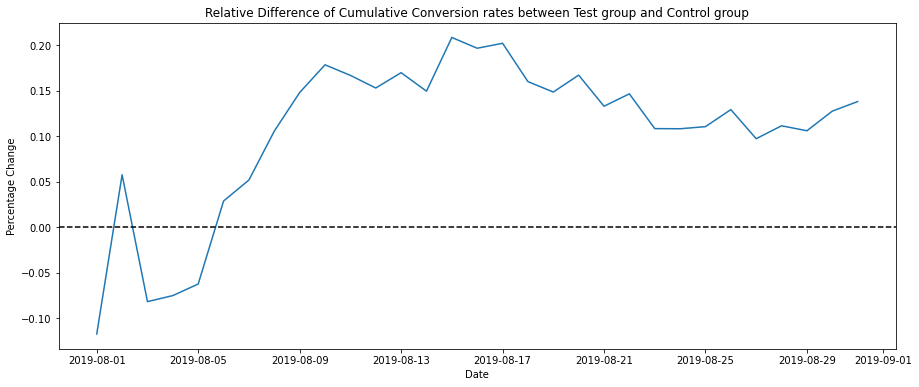

In [55]:
plt.plot(conv_difference['date'], (conv_difference['conv_b_cum'])/(conv_difference['conv_a_cum'])-1)
plt.title('Relative Difference of Cumulative Conversion rates between Test group and Control group')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.axhline(y=0, color='black', linestyle='--') 

Graph above shows that there is clearly a higher conversion rate in the Test group comparing to the Control group. It has 10%-20% higher conversion rates for most of the month. It proves that Test group is better that Control group.

# 2.5 Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [56]:
scat_a = orders_new[orders_new['group'] == 'A'].reset_index()
scat_a

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [57]:
scatt_a = scat_a.groupby(['visitorId'])[['transactionId', 'revenue']].agg({'transactionId': 'nunique', 'revenue': 'sum'}).reset_index()
scatt_a

,visitorId,transactionId,revenue
0,8300375,1,30.5
1,11685486,1,100.4
2,54447517,1,5.0
3,66685450,1,125.9
4,78758296,1,20.1
...,...,...,...
498,4243832526,1,130.5
499,4256040402,7,773.7
500,4259830713,1,50.1
501,4266935830,1,1220.2


In [58]:
scat_b = orders_new[orders_new['group'] == 'B'].reset_index()
scat_b

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
635,1189,4082620617,393266494,2019-08-14,490.4,B
636,1190,38478481,1197745035,2019-08-14,135.3,B
637,1191,3592955527,608641596,2019-08-14,255.7,B
638,1192,2662137336,3733762160,2019-08-14,100.8,B


In [59]:
scatt_b = scat_b.groupby(['visitorId'])[['transactionId', 'revenue']].agg({'transactionId': 'nunique', 'revenue': 'sum'}).reset_index()
scatt_b

,visitorId,transactionId,revenue
0,5114589,1,10.8
1,6958315,1,25.9
2,8300375,1,165.7
3,39475350,1,65.4
4,47206413,1,15.2
...,...,...,...
581,4258103007,1,95.5
582,4266935830,1,1220.2
583,4279090005,1,105.3
584,4281247801,1,45.6


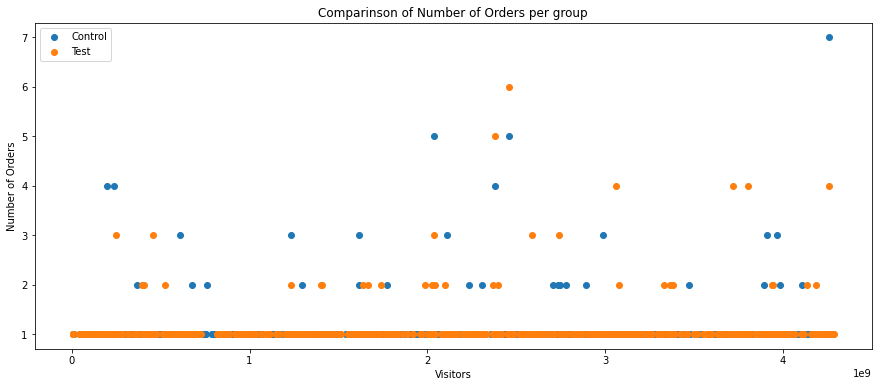

In [60]:
plt.scatter(scatt_a['visitorId'], scatt_a['transactionId'], label = 'Control')
plt.scatter(scatt_b['visitorId'], scatt_b['transactionId'], label = 'Test')
plt.title('Comparinson of Number of Orders per group')
plt.xlabel('Visitors')
plt.ylabel('Number of Orders')
plt.legend()

Graph shows that majority of the people in both Control and Test groups had 1 order. Out of the rest, most people had either 2 or 3 orders - approximately 51 (24 in Control group and 27 in Test group). Very few people had more than 3 orders - 12 in total (6 in Control group and 6 in Test group)

# 2.6 Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [61]:
print(np.percentile(scatt_a['transactionId'], [99]))

[3.98]


In [62]:
print(np.percentile(scatt_b['transactionId'], [99]))

[3.15]


It is important to look 99th percentailes to estimate which values we should consider to be an outliers. It appears, that for the Control group 99% of the people had no more that 3.98 orders and for the Test group, 99% of the people had no more than 3.15 orders. It means that for Control group, all those with 4 or more orders should be considered as an outliers. Same goes to the people in the Test group, who had more than 3.15 orders.

# 2.7 Plot a scatter chart of order prices. Make conclusions and conjectures.

In [63]:
rev_a = orders_new[orders_new['group'] == 'A'].reset_index()
rev_a

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [64]:
rev_b = orders_new[orders_new['group'] == 'B'].reset_index()
rev_b

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
635,1189,4082620617,393266494,2019-08-14,490.4,B
636,1190,38478481,1197745035,2019-08-14,135.3,B
637,1191,3592955527,608641596,2019-08-14,255.7,B
638,1192,2662137336,3733762160,2019-08-14,100.8,B


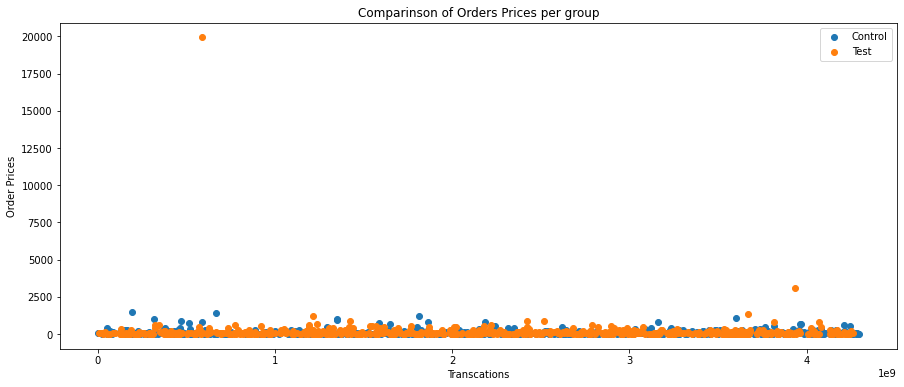

In [65]:
plt.scatter(rev_a['transactionId'], rev_a['revenue'], label = 'Control')
plt.scatter(rev_b['transactionId'], rev_b['revenue'], label = 'Test')
plt.title('Comparinson of Orders Prices per group')
plt.xlabel('Transcations')
plt.ylabel('Order Prices')
plt.legend()

Due to a massive outlier in Test group it is difficult to assess the scatter plor of the order prices. In order to analyse it, I need to plot a second scatter plot that does not have this outlier. 

In [66]:
rev_a_filtered = orders_new_filtered[orders_new_filtered['group'] == 'A'].reset_index()
rev_a_filtered

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [67]:
rev_b_filtered = orders_new_filtered[orders_new_filtered['group'] == 'B'].reset_index()
rev_b_filtered

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
634,1189,4082620617,393266494,2019-08-14,490.4,B
635,1190,38478481,1197745035,2019-08-14,135.3,B
636,1191,3592955527,608641596,2019-08-14,255.7,B
637,1192,2662137336,3733762160,2019-08-14,100.8,B


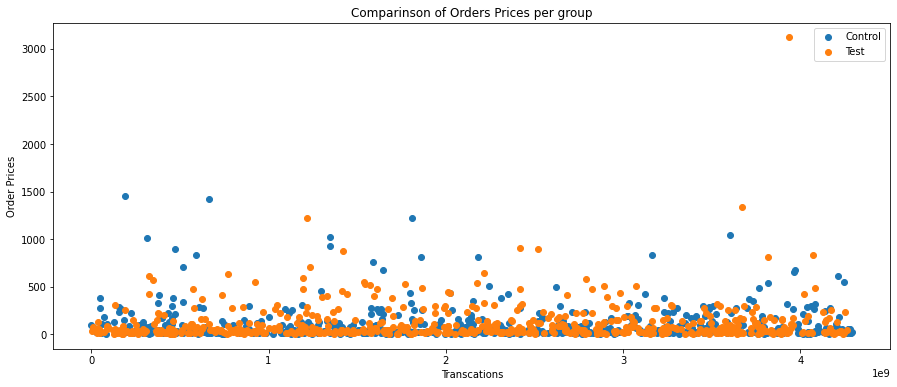

In [68]:
plt.scatter(rev_a_filtered['transactionId'], rev_a_filtered['revenue'], label = 'Control')
plt.scatter(rev_b_filtered['transactionId'], rev_b_filtered['revenue'], label = 'Test')
plt.title('Comparinson of Orders Prices per group')
plt.xlabel('Transcations')
plt.ylabel('Order Prices')
plt.legend()

Scatter plot above shows that majority of the order prices in located around 0-250 range. There are some order prices that are within 250-500 range and both of the groups, seems to have similar number of such order prices. However, when we look at higher price ranges, above 1000, it appears that there are more of those in the Control group rather than in the Test group. 

# 2.8 Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [69]:
print(np.percentile(rev_a['revenue'], [95, 99]))

[413.48  967.796]


In [70]:
print(np.percentile(rev_b['revenue'], [95, 99]))

[445.825 857.872]


In the same token as to how it was important to estimate which orders should be considered as ouliers, it is important to estimate what orders prices should also be considered an outlier. For this purpose, I will again look at 95th and 99th percentile. It appears, that for the Control group 95% of the order prices are not above 413.48 and 99% of the order prices are not above 967.796. For the Test group, 95% of the order prices are not above 445.825 and 99% of the order prices are not above 857.872. It really proves my comment under the order price scatter plot, as majority of the order prices are within 0-1000 price range.

# 2.9 Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [71]:
import math
from scipy import stats

In [72]:
visits_a['visits'].sum()

18736

In [73]:
visits_b['visits'].sum()

18916

In [74]:
scatt_a['transactionId'].sum()

557

In [75]:
scatt_b['transactionId'].sum()

640

In [76]:
control_trials = visits_a['visits'].sum()
print('Trials:', control_trials)
control_successes = scatt_a['transactionId'].sum()
print('Successes:', control_successes)

Trials: 18736
Successes: 557


In [77]:
p1=control_successes/control_trials
p1

0.029728864218616567

In [78]:
test_trials = visits_b['visits'].sum()
print('Trials:', test_trials)
test_successes = scatt_b['transactionId'].sum()
print('Successes:', test_successes)

Trials: 18916
Successes: 640


In [79]:
p2=test_successes/test_trials
p2

0.033833791499259885

In [80]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2 
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
  
    distr = stats.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2
  
    print('p-value: ', p_value)
    if p_value<0.05:
        print('Reject H0')
    else:
        print('Fail to Reject H0')


In [81]:
check_hypothesis(control_successes,control_trials, test_successes,test_trials, alpha=0.05)

p-value:  0.02320723394441848
Reject H0


We reject the Null Hypothesis. It appears that there is a statistical significance in the difference in the conversion between two groups. 

In [82]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([control_successes,test_successes], [control_trials,test_trials])
print('{0:0.5f}'.format(pval))

0.02321


In [83]:
stat

-2.270005753735332

In [84]:
proportions_ztest([control_successes,test_successes], [control_trials,test_trials])

(-2.270005753735332, 0.02320723394441847)

# 2.10 Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [85]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
            test='Welch t-test'
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True)
            test='t-test'
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
        test='Mann-Whitney'
    print('Chosen test:', test)
    print(p_value)
    
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

In [86]:
control_cum['avg_check'] = control_cum['revenue'] / control_cum['transactionId']
test_cum['avg_check'] = test_cum['revenue'] / test_cum['transactionId']

In [87]:
control_cum['avg_check'].mean()

116.47305191426933

In [88]:
test_cum['avg_check'].mean()

144.2254442859877

In [89]:
testing_average(control_cum['avg_check'], test_cum['avg_check'], alpha=0.05)

Chosen test: Mann-Whitney
0.4222761086468382
Fail to Reject H0


We fail to reject the Null Hypothesis. It appears that there is no difference in average order size between Control and Test groups.

# 2.11 Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [90]:
scat_a_filtered = orders_new_filtered[orders_new_filtered['group'] == 'A'].reset_index()
scat_a

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [91]:
scatt_a_filtered = scat_a_filtered.groupby(['visitorId'])[['transactionId', 'revenue']].agg({'transactionId': 'nunique', 'revenue': 'sum'}).reset_index()
scatt_a_filtered

,visitorId,transactionId,revenue
0,8300375,1,30.5
1,11685486,1,100.4
2,54447517,1,5.0
3,66685450,1,125.9
4,78758296,1,20.1
...,...,...,...
498,4243832526,1,130.5
499,4256040402,7,773.7
500,4259830713,1,50.1
501,4266935830,1,1220.2


In [92]:
scat_b_filtered = orders_new_filtered[orders_new_filtered['group'] == 'B'].reset_index()
scat_b

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
635,1189,4082620617,393266494,2019-08-14,490.4,B
636,1190,38478481,1197745035,2019-08-14,135.3,B
637,1191,3592955527,608641596,2019-08-14,255.7,B
638,1192,2662137336,3733762160,2019-08-14,100.8,B


In [93]:
scatt_b_filtered = scat_b_filtered.groupby(['visitorId'])[['transactionId', 'revenue']].agg({'transactionId': 'nunique', 'revenue': 'sum'}).reset_index()
scatt_b_filtered

,visitorId,transactionId,revenue
0,5114589,1,10.8
1,6958315,1,25.9
2,8300375,1,165.7
3,39475350,1,65.4
4,47206413,1,15.2
...,...,...,...
580,4258103007,1,95.5
581,4266935830,1,1220.2
582,4279090005,1,105.3
583,4281247801,1,45.6


In [94]:
control_trials_filtered = visits_a['visits'].sum()
print('Trials:', control_trials_filtered)
control_successes_filtered = scatt_a_filtered['transactionId'].sum()
print('Successes:', control_successes_filtered)

Trials: 18736
Successes: 557


In [95]:
test_trials_filtered = visits_b['visits'].sum()
print('Trials:', test_trials_filtered)
test_successes_filtered = scatt_b_filtered['transactionId'].sum()
print('Successes:', test_successes_filtered)

Trials: 18916
Successes: 639


In [96]:
p2=test_successes_filtered/test_trials_filtered
p2

0.03378092620004229

In [97]:
check_hypothesis(control_successes_filtered, control_trials_filtered, test_successes_filtered, test_trials_filtered, alpha=0.05)

p-value:  0.02498223444077685
Reject H0


In filtered data we still reject the Null Hypothesis. It appears that there is a statistical significance in the difference in the conversion between two groups. 

In [98]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([control_successes_filtered, test_successes_filtered], [control_trials_filtered, test_trials_filtered])
print('{0:0.5f}'.format(pval))

0.02498


In [99]:
stat

-2.24167732441924

In [100]:
proportions_ztest([control_successes_filtered, test_successes_filtered], [control_trials_filtered, test_trials_filtered])

(-2.24167732441924, 0.02498223444077692)

# 2.12 Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [101]:
control_cum_filtered['avg_check'] = control_cum_filtered['revenue'] / control_cum_filtered['transactionId']
test_cum_filtered['avg_check'] = test_cum_filtered['revenue'] / test_cum_filtered['transactionId']

In [102]:
control_cum_filtered['avg_check'].mean()

116.47305191426933

In [103]:
test_cum_filtered['avg_check'].mean()

113.79045964697077

In [104]:
testing_average(control_cum_filtered['avg_check'], test_cum_filtered['avg_check'], alpha=0.05)

Chosen test: Mann-Whitney
0.5449274247998621
Fail to Reject H0


In filtered data, we still fail to reject the Null Hypothesis. It appears that there is no difference in average order size between Control and Test groups.

# 2.13 Decision. 

Based on the analysis of the data various graphs and different hypotheses that are presented above, I believe that the test should be stopped. This is due to several reasons: 

Graphs that were taking into account an outlier in the Test group, were showing that the results of the Test group are better than the results of the Control group. However, after filtering out the outlier in the Test group, graphs were still showing that in terms of revenue and average order size, Test group is more successful than Control group. Moreover, if taking into consideration relative difference in the cumulative average order sizes between Test group and Control groups, after removing an outlier, it appears that there were not significant difference in cumulative average order sizes. All it means that the changes that the company made were benefitial. Furthermore, with regards to the graphs that showed conversion rates for both groups, Test group is less volative that the Control group, especially in the second half of the November, after the removal of an outlier. 

Two different scatter plots were made - one on number of orders per user and there was no clear difference and another scatter plot on order prices. After removal of an outlier, scatter plot showed that Control group has higher range of prices on their orders, while Test group is more consistent.

After that, two different types of hypothesis was made: one to check the differences in conversion between Control and Test groups and another one to check the differences in average order size between Control and Test groups. Each hypothesis was done twice: one on raw data and one on filtered data. 

Hypotheses, regarding differences in conversion between two groups showed that there is indeed difference in conversion. Converstion graphs showed that Test group has higher conversion. 

Hypotheses, regarding differences in average order size, showed that there is no difference in average order size, which is supported by graphs of relative difference in cumulative average order sizes between two groups. 

Taking into consideration all of the above, that Test group is better and provided greater revenue than the Control group, that it has higher conversion rate without having changes in average order size, test should be stopped, as there are clear indicators that Test group is the superior.